In [55]:
import math
import numpy as np
import PIL
from matplotlib import pyplot as plt
from PIL import Image
import time
from scipy import signal

def read_image(image_path):
    """Read an image into a numpy array.

    Args:
        image_path: Path to the image file.

    Returns:
        Numpy array containing the image
    """
    img = Image.open(image_path)
    return np.array(img)


def write_image(image, out_path):
    """Writes a numpy array as an image file.

    Args:
        image: Numpy array containing image to write
        out_path: Path for the output image
    """
    #image = (image*255.0).astype('uint8')
    img = Image.fromarray(image)
    img.save(out_path)


def display_image(image):
    """Displays a grayscale image using matplotlib.

    Args:
        image: HxW Numpy array containing image to display.
    """
    #image = (image*255.0).astype('uint8')
    return plt.imshow(image, cmap="gray")


def convert_to_grayscale(image):
    """Convert an RGB image to grayscale.

    Args:
        image: HxWx3 uint8-type Numpy array containing the RGB image to convert.

    Returns:
        uint8-type Numpy array containing the image in grayscale
    """
    H, W = image.shape[0], image.shape[1]
    grarray = np.zeros((H, W), dtype='uint8')
    for row in range(H):
        for col in range(W):
            pixel = image[row][col]
            R, G, B = pixel[0], pixel[1], pixel[2]
            L = (299/1000) * R + (587/1000) * G + (114/1000) * B
            grarray[row][col] = int(L)
    return grarray


def convert_to_float(image):
    """Convert an image from 8-bit integer to 64-bit float format

    Args:
        image: Integer-valued numpy array with values in [0, 255]
    Returns:
        Float-valued numpy array with values in [0, 1]
    """

    return image.astype('float64') / 255.0

#scipy.signal.convolve2d
def convolution(image, kernel):
    """Convolves image with kernel.

    The image should be zero-padded so that the input and output image sizes
    are equal.
    Args:
        image: HxW Numpy array, the grayscale image to convolve
        kernel: hxw numpy array
    Returns:
        image after performing convolution
    """
    H, W = image.shape
    h, w = kernel.shape
    k = (h - 1) // 2    #1/2 height
    l = (w - 1) // 2    #1/2 side  
    np.flipud(kernel)
    np.fliplr(kernel)
    convd = np.zeros((H, W))
    for row in range(H):
        for col in range(W):
            acc = 0
            for r in range(-k, k+1):
                for c in range(-l, l+1):
                    above = r + row < 0
                    below = r + row > H - 1
                    left = c + col < 0
                    right = c + col > W - 1
                    if not (above or below or left or right):
                        acc += image[row+r][col+c] * kernel[r][c]
            convd[row][col] = acc
    return convd



def gaussian_blur(image, ksize=3, sigma=1.0):
    """Blurs image by convolving it with a gaussian kernel.

    Args:
        image: HxW Numpy array, the grayscale image to blur
        ksize: size of the gaussian kernel
        sigma: variance for generating the gaussian kernel

    Returns:
        The blurred image
    """
    
    kernel = np.zeros((ksize, ksize))
    acc = 0
    radius = (ksize - 1) // 2
    for row in range(-radius, radius+1):
        for col in range(-radius, radius+1):
            val = math.exp(-(row**2+col**2)/(2*(sigma**2)))
            acc += val
            kernel[row+radius][col+radius] = val
    
    return convolution(image, kernel/acc)
    

def sobel_filter(image):
    """Detects image edges using the sobel filter.

    The sobel filter uses two kernels to compute the vertical and horizontal
    gradients of the image. The two kernels are:
    G_x = [-1 0 1]      G_y = [-1 -2 -1]
          [-2 0 2]            [ 0  0  0]
          [-1 0 1]            [ 1  2  1]

    After computing the two gradients, the image edges can be obtained by
    computing the gradient magnitude.

    Args:
        image: HxW Numpy array, the grayscale image
    Returns:
        HxW Numpy array from applying the sobel filter to image
    """
    print('Image: {}\n'.format(image))
    x = np.array([[-1,0,1],[-2,0,2],[-1,0,1]], dtype='float64')
    y = np.array([[-1,-2,-1],[0,0,0],[1,2,1]], dtype='float64')
    
    #element-wise distance between x and y gradient
    G_x = convolution(image, x)
    G_y = convolution(image, y)
    print('X gradient: {}\n'.format(G_x))
    print('Y gradient: {}\n'.format(G_y))
    intensity = np.hypot(G_x, G_y)
    print('Intensity: {}\n'.format(intensity))
    intensity = intensity / intensity.max() * 255
    print('Pixel Range Adjusted Intensity: {}\n'.format(intensity))
    return intensity


def dog(image, ksize1=5, sigma1=1.0, ksize2=9, sigma2=2.0):
    """Detects image edges using the difference of gaussians algorithm

    Args:
        image: HxW Numpy array, the grayscale image
        ksize1: size of the first gaussian kernel
        sigma1: variance of the first gaussian kernel
        ksize2: size of the second gaussian kernel
        sigma2: variance of the second gaussian kernel
    Returns:
        HxW Numpy array from applying difference of gaussians to image
    """
    return gaussian_blur(image, ksize1, sigma1) - gaussian_blur(image, ksize2, sigma2)


def dft(image):
  """Computes the discrete fourier transform of image

  This function should return the same result as
  np.fft.fftshift(np.fft.fft2(image)). You may assume that
  image dimensions will always be even.

  Args:
    image: HxW Numpy array, the grayscale image
  Returns:
    NxW complex Numpy array, the fourier transform of the image
  """
  pass


def idft(ft_image):
  """Computes the inverse discrete fourier transform of ft_image.

  For this assignment, the complex component of the output should be ignored.
  The returned array should NOT be complex. The real component should be
  the same result as np.fft.ifft2(np.fft.ifftshift(ft_image)). You
  may assume that image dimensions will always be even.

  Args:
    ft_image: HxW complex Numpy array, a fourier image
  Returns:
    NxW float Numpy array, the inverse fourier transform
  """
  pass


def visualize_kernels():
    """Visualizes your implemented kernels.

    This function should read example.png, convert it to grayscale and float-type,
    and run the functions gaussian_blur, sobel_filter, and dog over it. For each function,
    visualize the result and save it as example_{function_name}.png e.g. example_dog.png.
    This function does not need to return anything.
    """
    example = convert_to_float(read_image("example.png"))
    
    gauss = gaussian_blur(example)
    display_image(gauss)
    write_image(gauss, "example_gaussian_blur.png")

    sobel = sobel_filter(example)
    display_image(sobel)
    write_image(sobel, "example_sobel_filter.png")
    
    dg = dog(example)
    display_image(dg)
    write_image(dg, "example_dog.png")

def visualize_dft():
  """Visualizes the discrete fourier transform.

  This function should read example.png, convert it to grayscale and float-type,
  and run dft on it. Try masking out parts of the fourier transform image and
  recovering the original image using idft. Can you create a blurry version
  of the original image? Visualize the blurry image and save it as example_blurry.png.
  This function does not need to return anything.
  """
  pass



In [62]:
def sobel_filters(img):
    print('Image: {}\n'.format(img))
    Kx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], dtype='float64')
    Ky = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]], dtype='float64')
    
    Ix = signal.convolve(img, Kx, mode='same')
    Iy = signal.convolve(img, Ky, mode='same')
    print('X gradient: {}\n'.format(Ix))
    print('Y gradient: {}\n'.format(Iy))    
    G = np.hypot(Ix, Iy)
    print('Intensity: {}\n'.format(G))
    G = G / G.max() * 255
    print('Pixel Range Adjusted Intensity: {}\n'.format(G))

    return G

[[0.45490196 0.44705882 0.43137255 ... 0.30980392 0.36862745 0.42745098]
 [0.44705882 0.43529412 0.41960784 ... 0.29411765 0.34509804 0.40392157]
 [0.44313725 0.42745098 0.41568627 ... 0.2627451  0.30980392 0.35686275]
 ...
 [0.86666667 0.8        0.72941176 ... 0.17647059 0.20784314 0.23921569]
 [0.92941176 0.86666667 0.78431373 ... 0.19607843 0.23137255 0.25882353]
 [0.98431373 0.91764706 0.83921569 ... 0.21960784 0.25490196 0.27843137]]


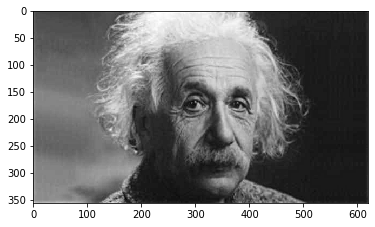

In [63]:
example = read_image("example.png")
example = convert_to_float(example)
print(example)
display_image(example)

In [64]:
a = sobel_filter(example)

Image: [[0.45490196 0.44705882 0.43137255 ... 0.30980392 0.36862745 0.42745098]
 [0.44705882 0.43529412 0.41960784 ... 0.29411765 0.34509804 0.40392157]
 [0.44313725 0.42745098 0.41568627 ... 0.2627451  0.30980392 0.35686275]
 ...
 [0.86666667 0.8        0.72941176 ... 0.17647059 0.20784314 0.23921569]
 [0.92941176 0.86666667 0.78431373 ... 0.19607843 0.23137255 0.25882353]
 [0.98431373 0.91764706 0.83921569 ... 0.21960784 0.25490196 0.27843137]]

X gradient: [[-1.34901961  0.03137255  0.04705882 ... -0.11764706 -0.16078431
  -0.17647059]
 [-1.78823529  0.05098039  0.05490196 ... -0.13333333 -0.20392157
  -0.21176471]
 [-1.76862745  0.06666667  0.05098039 ... -0.12156863 -0.16862745
  -0.18431373]
 ...
 [-3.54901961  0.25490196  0.30588235 ... -0.06666667 -0.1372549
  -0.11764706]
 [-3.76470588  0.2627451   0.30980392 ... -0.0745098  -0.1372549
  -0.10588235]
 [-1.91372549  0.12941176  0.16078431 ... -0.03529412 -0.07058824
  -0.05098039]]

Y gradient: [[-1.34901961 -1.76470588 -1.7098

In [65]:
b = sobel_filters(example)

Image: [[0.45490196 0.44705882 0.43137255 ... 0.30980392 0.36862745 0.42745098]
 [0.44705882 0.43529412 0.41960784 ... 0.29411765 0.34509804 0.40392157]
 [0.44313725 0.42745098 0.41568627 ... 0.2627451  0.30980392 0.35686275]
 ...
 [0.86666667 0.8        0.72941176 ... 0.17647059 0.20784314 0.23921569]
 [0.92941176 0.86666667 0.78431373 ... 0.19607843 0.23137255 0.25882353]
 [0.98431373 0.91764706 0.83921569 ... 0.21960784 0.25490196 0.27843137]]

X gradient: [[-1.32941176  0.0745098   0.08627451 ... -0.28627451 -0.34509804
   1.08235294]
 [-1.74509804  0.10588235  0.10980392 ... -0.35294118 -0.43137255
   1.36862745]
 [-1.70980392  0.11372549  0.11372549 ... -0.30196078 -0.37254902
   1.23921569]
 ...
 [-3.22745098  0.55294118  0.47843137 ... -0.20392157 -0.25490196
   0.83921569]
 [-3.45098039  0.57254902  0.5254902  ... -0.20784314 -0.24705882
   0.9254902 ]
 [-2.70196078  0.43529412  0.41176471 ... -0.16078431 -0.18039216
   0.74117647]]

Y gradient: [[-1.32941176 -1.7372549  -1.68

[[121.60740597 112.50393591 109.02786376 ...  84.3237831   98.27384506
   51.97557389]
 [114.00351756   4.25682291   4.03063302 ...   9.86032842  14.1138579
   13.82761558]
 [112.74305895   4.42946636   4.25682291 ...  10.95880693  14.8516237
   12.86795463]
 ...
 [226.35484926  19.21026277  21.91191135 ...   6.00966832   9.72634167
    7.76113256]
 [240.2957387   22.6494762   23.77994653 ...   7.45729953  10.20291063
    7.28779331]
 [122.39409281  16.03314528  16.74980497 ...   6.17378501   7.10546107
    4.25682291]]


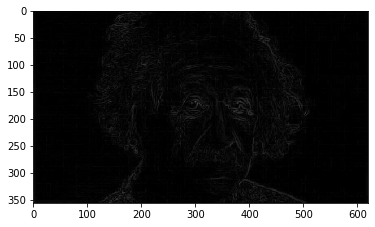

In [66]:
print(a)
display_image(a)

[[119.85459941 110.8518155  107.64060572 ...  77.91742424  91.19347564
  100.8129456 ]
 [111.28398357   7.97652807   8.32165849 ...  25.5         31.32491022
   88.17666925]
 [109.01834708   7.94512429   8.16241386 ...  23.95046972  29.95204501
   80.60397013]
 ...
 [206.74410512  43.95025597  38.81043674 ...  16.40121947  18.95059366
   53.95600059]
 [221.14757516  46.93080012  43.34166587 ...  17.3817433   19.35523185
   59.53990259]
 [244.6612454  221.49520311 203.45054682 ...  52.26495001  59.61962764
   67.17607461]]


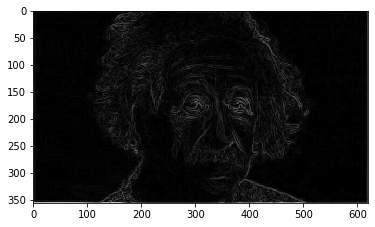

In [67]:
print(b)
display_image(b)

My program took 3.695487976074219e-05 to run
My program took 0.00010585784912109375 to run
My program took 0.0001380443572998047 to run


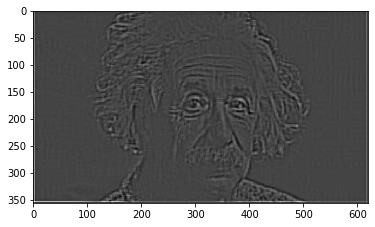

In [94]:
visualize_kernels()

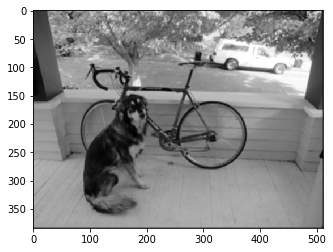

In [5]:
k = np.zeros((3,3)) + (1/9)
s = signal.convolve(convert_to_grayscale(read_image('dogbike.jpg')), k, mode="same")
c = convolution(convert_to_grayscale(read_image('dogbike.jpg')), k)

In [ ]:
display_image(s)

In [ ]:
display_image(c)

In [10]:
print(s.astype('uint8')==c.astype('uint8'))

[[ True  True  True ... False  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [False  True  True ... False  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ... False  True  True]]


In [11]:
print(s.astype('uint8'))

[[ 25  39  39 ... 110  75  30]
 [ 38  58  59 ... 155 103  40]
 [ 38  58  59 ... 138  89  33]
 ...
 [110 164 163 ... 109  87  47]
 [109 163 162 ... 102  77  39]
 [ 72 108 108 ...  67  49  24]]


In [12]:
print(c.astype('uint8'))

[[ 25  39  39 ... 109  75  30]
 [ 38  58  59 ... 155 103  40]
 [ 38  58  59 ... 138  89  33]
 ...
 [109 164 163 ... 108  87  47]
 [109 163 162 ... 102  77  39]
 [ 72 108 108 ...  66  49  24]]


In [13]:
print(s)

[[ 25.66666667  39.          39.66666667 ... 110.          75.22222222
   30.11111111]
 [ 38.33333333  58.33333333  59.44444444 ... 155.55555556 103.88888889
   40.44444444]
 [ 38.33333333  58.33333333  59.55555556 ... 138.55555556  89.11111111
   33.11111111]
 ...
 [110.         164.33333333 163.22222222 ... 109.          87.
   47.22222222]
 [109.55555556 163.77777778 162.77777778 ... 102.22222222  77.11111111
   39.22222222]
 [ 72.77777778 108.77777778 108.11111111 ...  67.          49.66666667
   24.66666667]]


In [14]:
print(c)

[[ 25.66666667  39.          39.66666667 ... 110.          75.22222222
   30.11111111]
 [ 38.33333333  58.33333333  59.44444444 ... 155.55555556 103.88888889
   40.44444444]
 [ 38.33333333  58.33333333  59.55555556 ... 138.55555556  89.11111111
   33.11111111]
 ...
 [110.         164.33333333 163.22222222 ... 109.          87.
   47.22222222]
 [109.55555556 163.77777778 162.77777778 ... 102.22222222  77.11111111
   39.22222222]
 [ 72.77777778 108.77777778 108.11111111 ...  67.          49.66666667
   24.66666667]]
